In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
train_df = pd.read_csv(r"D:\ML\FinancialFraud\train.csv")
valid_df = pd.read_csv(r"D:\ML\FinancialFraud\validation.csv")



In [3]:
train_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,619,CASH_IN,386385.08,C421351828,4669568.85,5055953.92,C1977099364,506035.06,119649.98,0,0
1,164,CASH_IN,212458.78,C83569848,234635.00,447093.78,C1690589535,806037.88,593579.10,0,0
2,382,PAYMENT,19967.60,C852995095,3634.00,0.00,M1695416333,0.00,0.00,0,0
3,180,CASH_OUT,527616.51,C61761046,180216.00,0.00,C577654587,92157.10,619773.61,0,0
4,36,TRANSFER,206067.85,C758004147,0.00,0.00,C2143015292,2131494.48,2337562.32,0,0


In [4]:
valid_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [ ]:


import seaborn as sns


print(train_df.info())
print(train_df.describe())
print(train_df.isnull().sum())

print(valid_df.info())
print(valid_df.describe())
print(valid_df.isnull().sum())






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090096 entries, 0 to 5090095
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFlaggedFraud  int64  
 10  isFraud         int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 427.2+ MB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  5.090096e+06  5.090096e+06   5.090096e+06    5.090096e+06   
mean   2.433927e+02  1.797576e+05   8.333894e+05    8.545642e+05   
std    1.423214e+02  6.016180e+05   2.886947e+06    2.922632e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.339572e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.486501e+04

In [ ]:


def add_account_type_features(df):
    df['orig_prefix'] = df['nameOrig'].str[0]
    df['dest_prefix'] = df['nameDest'].str[0]
    return df

train_df = add_account_type_features(train_df)
valid_df = add_account_type_features(valid_df)



In [ ]:

from sklearn.preprocessing import LabelEncoder

nameOrig_encoder = LabelEncoder()
nameDest_encoder = LabelEncoder()

train_df['nameOrig_encoded'] = nameOrig_encoder.fit_transform(train_df['nameOrig'])
train_df['nameDest_encoded'] = nameDest_encoder.fit_transform(train_df['nameDest'])


valid_df['nameOrig_encoded'] = nameOrig_encoder.fit_transform(valid_df['nameOrig'])
valid_df['nameDest_encoded'] = nameDest_encoder.fit_transform(valid_df['nameDest'])




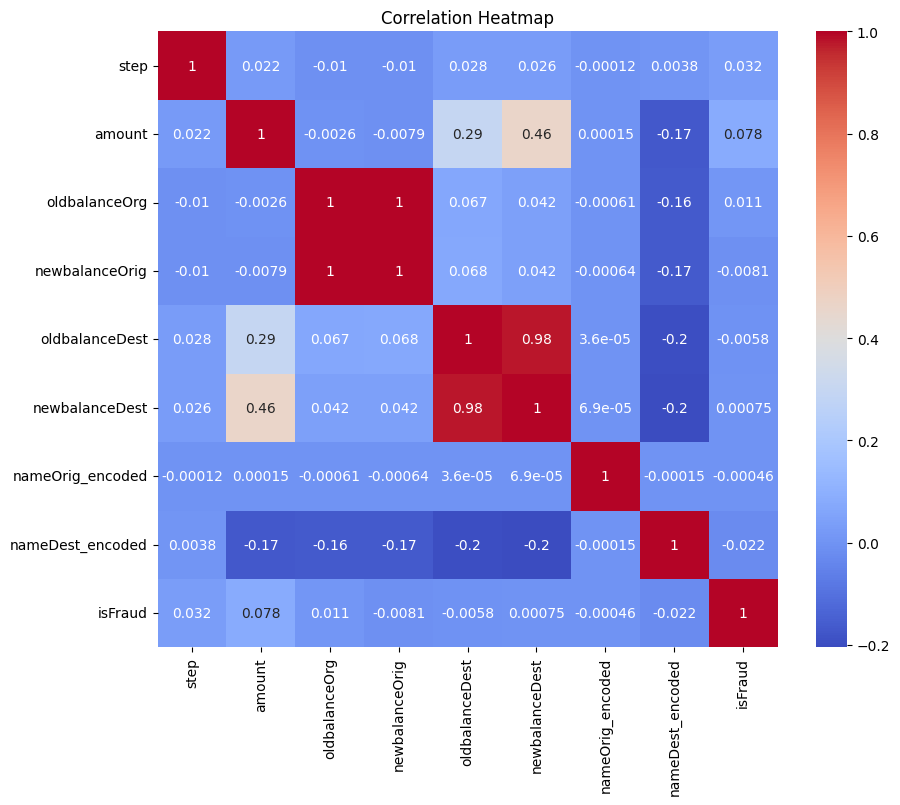

In [ ]:

corr_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
             'oldbalanceDest', 'newbalanceDest', 'nameOrig_encoded',
             'nameDest_encoded', 'isFraud']

plt.figure(figsize=(10,8))
sns.heatmap(train_df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


type
TRANSFER    0.007710
CASH_OUT    0.001846
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


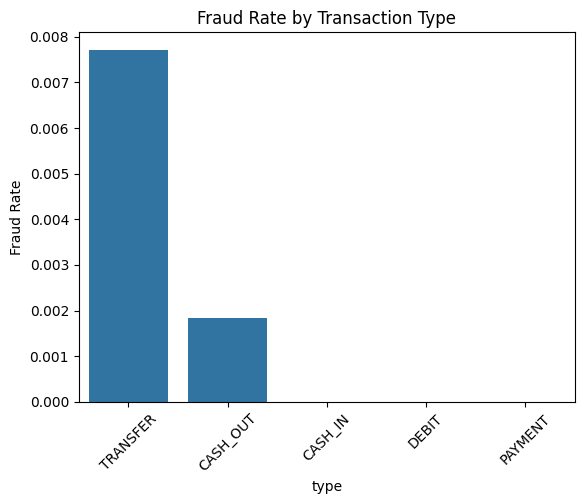


Fraud rate by orig_prefix:
 orig_prefix
C    0.001295
Name: isFraud, dtype: float64

Fraud rate by dest_prefix:
 dest_prefix
C    0.001957
M    0.000000
Name: isFraud, dtype: float64


In [ ]:


fraud_by_type = train_df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
print(fraud_by_type)

sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values)
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Transaction Type')
plt.xticks(rotation=45)
plt.show()


for prefix in ['orig_prefix', 'dest_prefix']:
    rate = train_df.groupby(prefix)['isFraud'].mean()
    print(f"\nFraud rate by {prefix}:\n", rate)

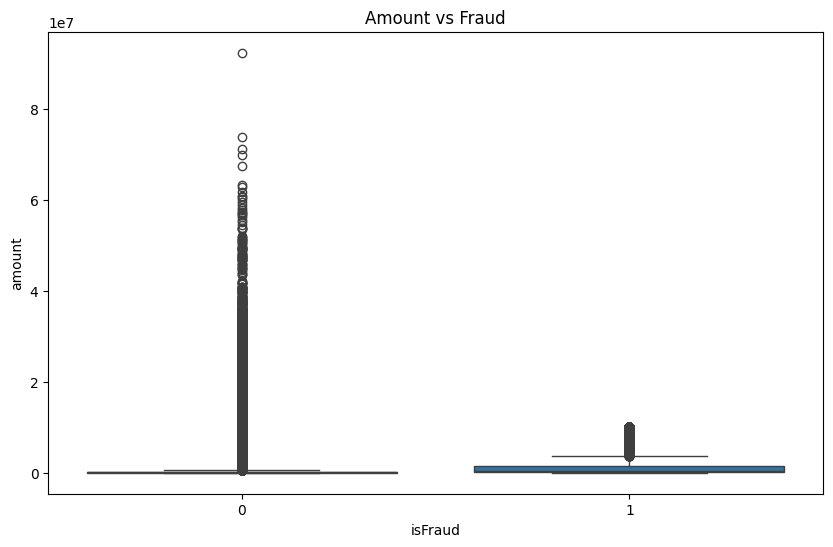

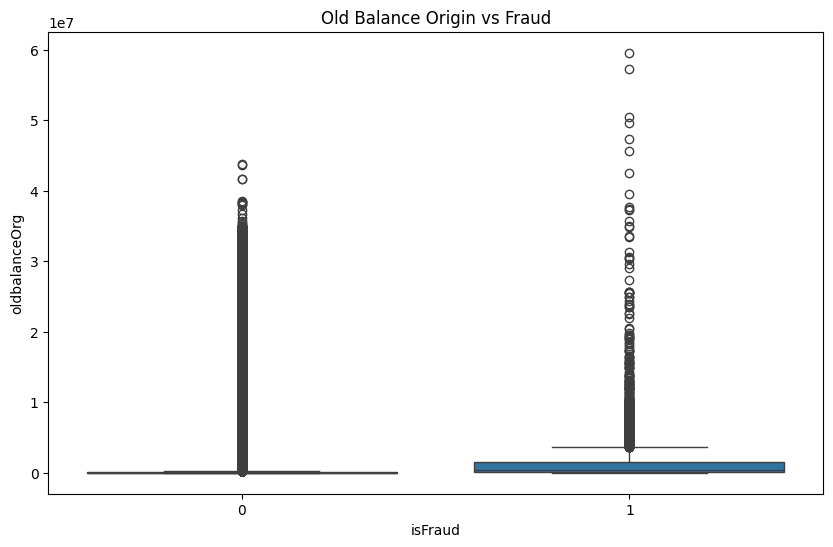

In [ ]:


plt.figure(figsize=(10,6))
sns.boxplot(data=train_df, x='isFraud', y='amount')
plt.title("Amount vs Fraud")
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(data=train_df, x='isFraud', y='oldbalanceOrg')
plt.title("Old Balance Origin vs Fraud")
plt.show()

In [ ]:

def add_balance_diff_features(df):
    df['balance_diff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
    df['balance_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
    return df

train_df = add_balance_diff_features(train_df)
valid_df = add_balance_diff_features(valid_df)

Fraud Class Distribution (Train):
isFraud
0    5083503
1       6593
Name: count, dtype: int64

Fraud Class Percentage (Train):
isFraud
0    99.870474
1     0.129526
Name: proportion, dtype: float64


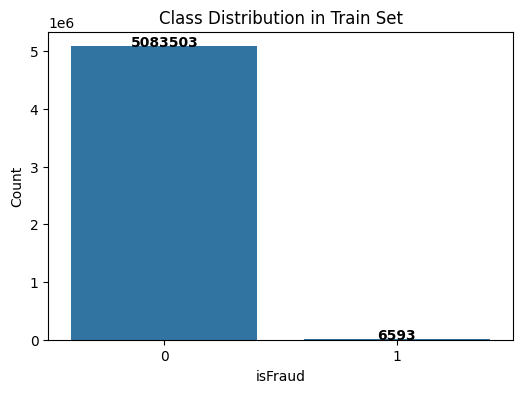

In [ ]:

fraud_counts = train_df['isFraud'].value_counts()
fraud_percent = train_df['isFraud'].value_counts(normalize=True) * 100

print("Fraud Class Distribution (Train):")
print(fraud_counts)
print("\nFraud Class Percentage (Train):")
print(fraud_percent)

plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x='isFraud')
plt.title("Class Distribution in Train Set")
plt.xlabel("isFraud")
plt.ylabel("Count")
for i, v in enumerate(fraud_counts.values):
    plt.text(i, v + 1000, f'{v}', ha='center', fontweight='bold')
plt.show()


Fraud Class Distribution (Validation):
isFraud
0    1270904
1       1620
Name: count, dtype: int64

Fraud Class Percentage (Validation):
isFraud
0    99.872694
1     0.127306
Name: proportion, dtype: float64


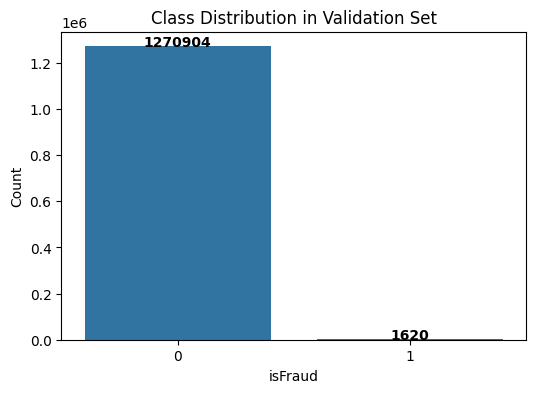

In [ ]:



fraud_counts_valid = valid_df['isFraud'].value_counts()
fraud_percent_valid = valid_df['isFraud'].value_counts(normalize=True) * 100

print("Fraud Class Distribution (Validation):")
print(fraud_counts_valid)
print("\nFraud Class Percentage (Validation):")
print(fraud_percent_valid)

plt.figure(figsize=(6,4))
sns.countplot(data=valid_df, x='isFraud')
plt.title("Class Distribution in Validation Set")
plt.xlabel("isFraud")
plt.ylabel("Count")
for i, v in enumerate(fraud_counts_valid.values):
    plt.text(i, v + 500, f'{v}', ha='center', fontweight='bold') 
plt.show()


In [ ]:

fraud_df = train_df[train_df['isFraud'] == 1]
nonfraud_df = train_df[train_df['isFraud'] == 0]


nonfraud_sampled = nonfraud_df.sample(n=120000, random_state=42)


from sklearn.utils import resample
fraud_upsampled = resample(fraud_df, 
                           replace=True, 
                           n_samples=12000,  
                           random_state=42)


reduced_train_df = pd.concat([nonfraud_sampled, fraud_upsampled]).sample(frac=1, random_state=42)  # shuffle


print(reduced_train_df['isFraud'].value_counts())


isFraud
0    120000
1     12000
Name: count, dtype: int64


In [ ]:

fraud_valid = valid_df[valid_df['isFraud'] == 1]
nonfraud_valid = valid_df[valid_df['isFraud'] == 0]

nonfraud_valid_sampled = nonfraud_valid.sample(n=15000, random_state=42)

from sklearn.utils import resample
fraud_valid_upsampled = resample(fraud_valid,
                                  replace=True,
                                  n_samples=3000,
                                  random_state=42)


reduced_valid_df = pd.concat([nonfraud_valid_sampled, fraud_valid_upsampled]).sample(frac=1, random_state=42)


print(reduced_valid_df['isFraud'].value_counts())


isFraud
0    15000
1     3000
Name: count, dtype: int64


In [ ]:

fraud_train = train_df[train_df['isFraud'] == 1]
nonfraud_train = train_df[train_df['isFraud'] == 0]

nonfraud_sampled = nonfraud_train.sample(n=48000, random_state=42)
fraud_upsampled = resample(fraud_train, replace=True, n_samples=12000, random_state=42)

reduced_train_df = pd.concat([nonfraud_sampled, fraud_upsampled]).sample(frac=1, random_state=42)


fraud_valid = valid_df[valid_df['isFraud'] == 1]
nonfraud_valid = valid_df[valid_df['isFraud'] == 0]

nonfraud_valid_sampled = nonfraud_valid.sample(n=15000, random_state=42)
fraud_valid_upsampled = resample(fraud_valid, replace=True, n_samples=3000, random_state=42)

reduced_valid_df = pd.concat([nonfraud_valid_sampled, fraud_valid_upsampled]).sample(frac=1, random_state=42)


In [ ]:

X_train = reduced_train_df.drop('isFraud', axis=1)
y_train = reduced_train_df['isFraud']

X_valid = reduced_valid_df.drop('isFraud', axis=1)
y_valid = reduced_valid_df['isFraud']


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


cols_to_drop = ['nameOrig', 'nameDest', 'orig_prefix', 'dest_prefix']
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_valid = X_valid.drop(columns=cols_to_drop, errors='ignore')

X_train = X_train.replace({True: 1, False: 0})
X_valid = X_valid.replace({True: 1, False: 0})

categorical_cols = ['type']
X_train_cat = pd.get_dummies(X_train[categorical_cols], drop_first=True)
X_valid_cat = pd.get_dummies(X_valid[categorical_cols], drop_first=True)

X_train_cat, X_valid_cat = X_train_cat.align(X_valid_cat, join='left', axis=1, fill_value=0)

X_train_num = X_train.drop(columns=categorical_cols)
X_valid_num = X_valid.drop(columns=categorical_cols)

X_train_final = pd.concat([X_train_num.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_valid_final = pd.concat([X_valid_num.reset_index(drop=True), X_valid_cat.reset_index(drop=True)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_train_final, y_train, test_size=0.2, random_state=42)


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 


X_valid_scaled = scaler.transform(X_valid_final)




In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve
)


In [ ]:
def evaluate_model(model, X, y_true, is_unsupervised=False):
    if is_unsupervised:
        y_pred = model.predict(X)
        y_pred = np.where(y_pred == -1, 1, 0) 
        y_proba = None  
    else:
        y_pred = model.predict(X)
        y_proba = model.predict_proba(X)[:, 1]

    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
    }

    if not is_unsupervised and y_proba is not None:
        metrics["ROC AUC"] = roc_auc_score(y_true, y_proba)
    else:
        metrics["ROC AUC"] = None

    return metrics, y_pred, y_proba


In [59]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)






LogisticRegression(max_iter=1000, random_state=42)

In [60]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:24:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [62]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train_scaled)




IsolationForest(contamination=0.01, random_state=42)

In [63]:
# One-Class SVM
oc_svm = OneClassSVM(nu=0.01, kernel='rbf', gamma='scale')
oc_svm.fit(X_train_scaled)

OneClassSVM(nu=0.01)

In [64]:
models = {
    "Logistic Regression": (lr, False),
    "Random Forest": (rf, False),
    "XGBoost": (xgb, False),
    "Isolation Forest": (iso_forest, True),
    "One-Class SVM": (oc_svm, True)
}

results = []

for name, (model, is_unsup) in models.items():
    metrics, y_pred, y_proba = evaluate_model(model, X_test, y_test, is_unsup)
    metrics["Model"] = name
    results.append(metrics)

results_df = pd.DataFrame(results).set_index("Model")
results_df


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, 

,Accuracy,Precision,Recall,F1-Score,ROC AUC
Model,,,,,
Logistic Regression,0.861500,0.601805,0.970089,0.742804,0.901646
Random Forest,0.744250,0.402299,0.495150,0.443921,0.861063
XGBoost,0.638917,0.362520,0.990703,0.530807,0.775336
Isolation Forest,0.303333,0.228205,0.998787,0.371523,NaN
One-Class SVM,0.206167,0.206167,1.000000,0.341854,NaN


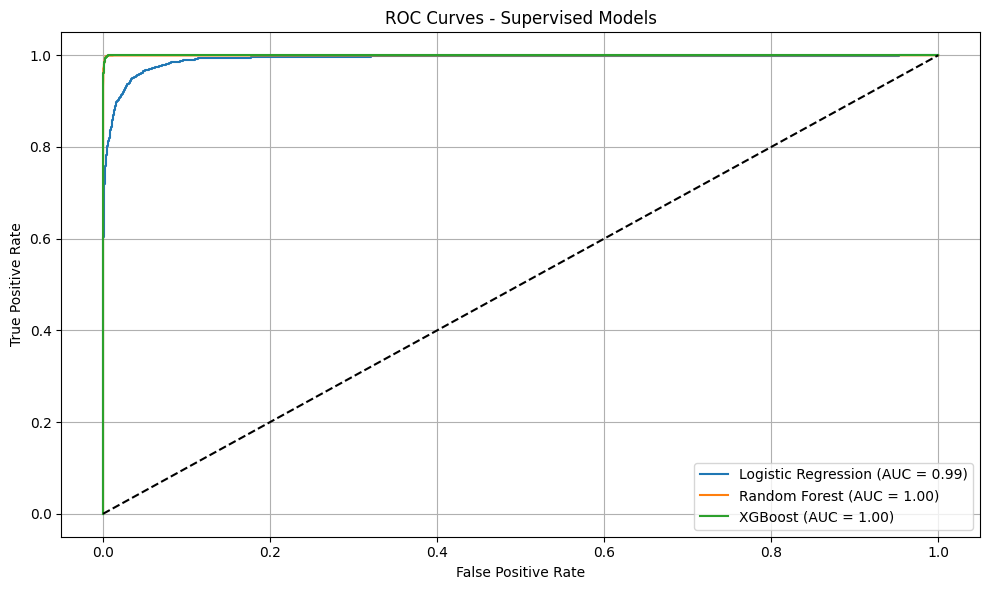

In [65]:
plt.figure(figsize=(10, 6))

for name, (model, is_unsup) in models.items():
    if not is_unsup:
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Supervised Models')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [66]:
valid_results = []

for name, (model, is_unsup) in models.items():
    metrics, y_pred, y_proba = evaluate_model(model, X_valid_scaled, y_valid, is_unsup)
    metrics["Model"] = name
    valid_results.append(metrics)

valid_results_df = pd.DataFrame(valid_results).set_index("Model")
valid_results_df


,Accuracy,Precision,Recall,F1-Score,ROC AUC
Model,,,,,
Logistic Regression,0.969167,0.936763,0.874000,0.904294,0.991629
Random Forest,0.994333,0.986895,0.979000,0.982932,0.997526
XGBoost,0.996000,0.986379,0.989667,0.988020,0.997803
Isolation Forest,0.839778,0.946154,0.041000,0.078594,NaN
One-Class SVM,0.827278,0.330218,0.035333,0.063836,NaN


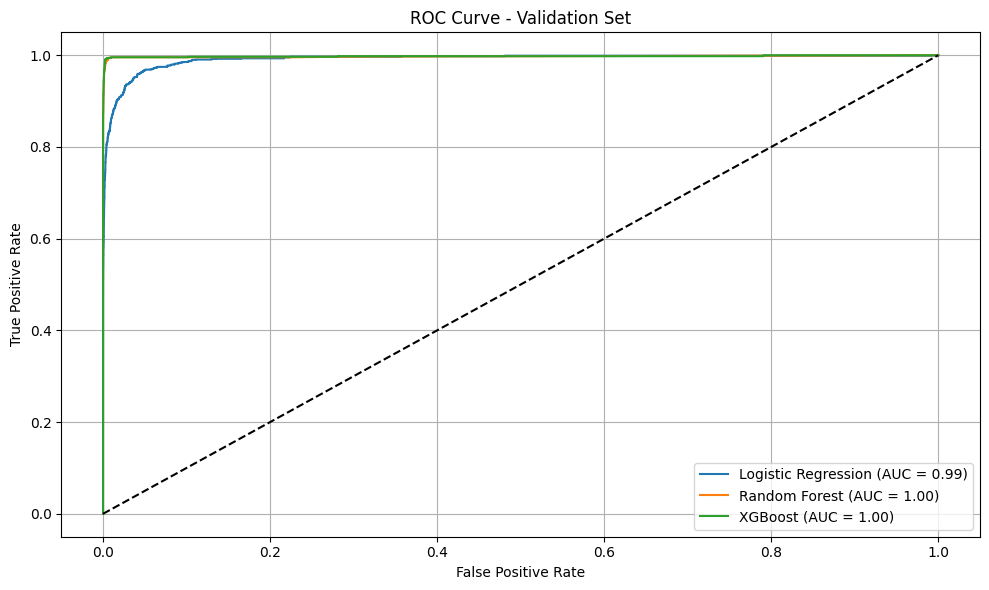

In [67]:
plt.figure(figsize=(10, 6))

for name, (model, is_unsup) in models.items():
    if not is_unsup:
        y_proba = model.predict_proba(X_valid_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_valid, y_proba)
        auc = roc_auc_score(y_valid, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:

comparison_df = results_df.add_suffix('_Test').join(valid_results_df.add_suffix('_Valid'))
comparison_df


,Accuracy_Test,Precision_Test,Recall_Test,F1-Score_Test,ROC AUC_Test,Accuracy_Valid,Precision_Valid,Recall_Valid,F1-Score_Valid,ROC AUC_Valid
Model,,,,,,,,,,
Logistic Regression,0.861500,0.601805,0.970089,0.742804,0.901646,0.969167,0.936763,0.874000,0.904294,0.991629
Random Forest,0.744250,0.402299,0.495150,0.443921,0.861063,0.994333,0.986895,0.979000,0.982932,0.997526
XGBoost,0.638917,0.362520,0.990703,0.530807,0.775336,0.996000,0.986379,0.989667,0.988020,0.997803
Isolation Forest,0.303333,0.228205,0.998787,0.371523,NaN,0.839778,0.946154,0.041000,0.078594,NaN
One-Class SVM,0.206167,0.206167,1.000000,0.341854,NaN,0.827278,0.330218,0.035333,0.063836,NaN
